In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df1 = pd.read_excel('C:\\Users\\choven\\Desktop\\恐怖袭击\\terror.xlsx',sheet_name='Data')

In [10]:
df = df1.copy()

In [12]:
df = df[(df.iyear == 2015) | (df.iyear == 2016) | (df.iyear == 2017)]

In [13]:
pd.set_option('display.max_columns', len(df.columns))

In [15]:
df.attacktype1_txt.value_counts()

Bombing/Explosion                      19794
Armed Assault                           8466
Hostage Taking (Kidnapping)             3207
Unknown                                 2638
Assassination                           2564
Facility/Infrastructure Attack          2152
Unarmed Assault                          267
Hostage Taking (Barricade Incident)      225
Hijacking                                139
Name: attacktype1_txt, dtype: int64

In [16]:
df.attacktype2_txt.value_counts()

Armed Assault                          1130
Facility/Infrastructure Attack          913
Bombing/Explosion                        89
Hostage Taking (Kidnapping)              17
Unarmed Assault                          11
Hostage Taking (Barricade Incident)       9
Assassination                             1
Name: attacktype2_txt, dtype: int64

In [17]:
df.attacktype3_txt.value_counts()

Facility/Infrastructure Attack    151
Armed Assault                      37
Unarmed Assault                     1
Name: attacktype3_txt, dtype: int64

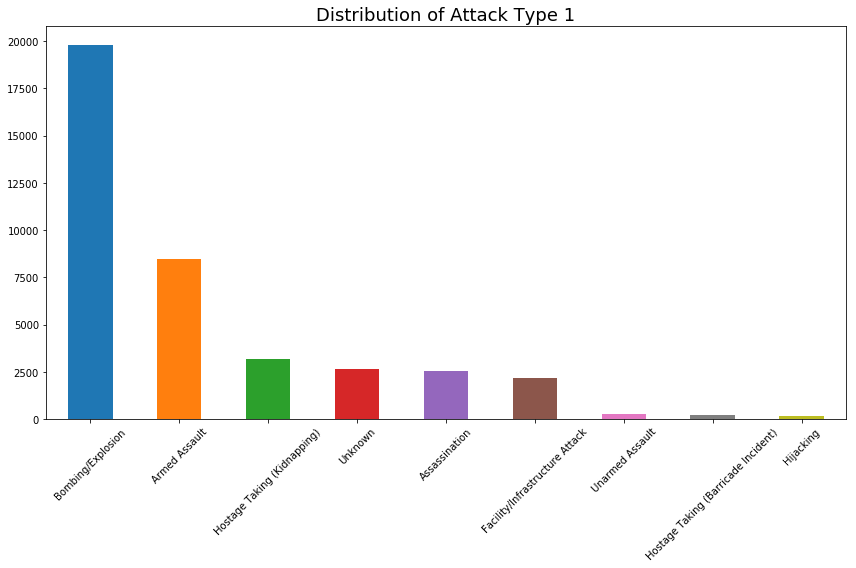

In [21]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Attack Type 1', fontsize=18)
df.attacktype1_txt.value_counts().plot(kind='bar');
plt.xticks(rotation=45);
plt.tight_layout()
plt.savefig('../visuals/attacktype1_distribution.jpg')
plt.show()

In [22]:
df.corr()['attacktype1'].sort_values(ascending=False).drop('attacktype1')[:15]

weaptype1         0.759484
weapsubtype2      0.326547
weaptype2         0.315379
extended          0.285038
weapsubtype1      0.266229
claimmode3        0.197616
INT_ANY           0.173982
INT_IDEO          0.167543
INT_LOG           0.166010
hostkidoutcome    0.128186
ishostkid         0.126568
weapsubtype3      0.095163
weaptype3         0.089458
property          0.088967
specificity       0.087842
Name: attacktype1, dtype: float64

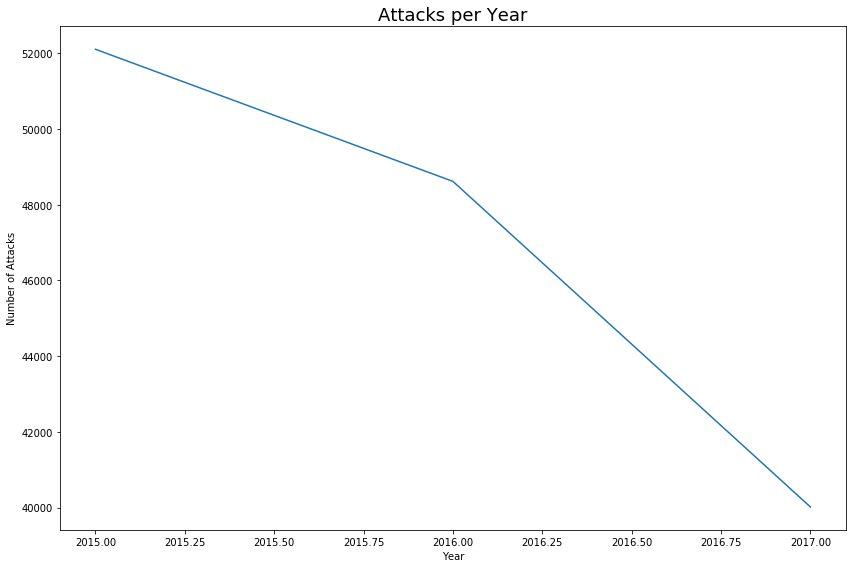

In [23]:
plt.figure(figsize=(12,8))
plt.title('Attacks per Year', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.plot(df.attacktype1.groupby(df.iyear).sum())
plt.tight_layout()
plt.savefig('../visuals/attacktype1_sum_per_year.jpg')

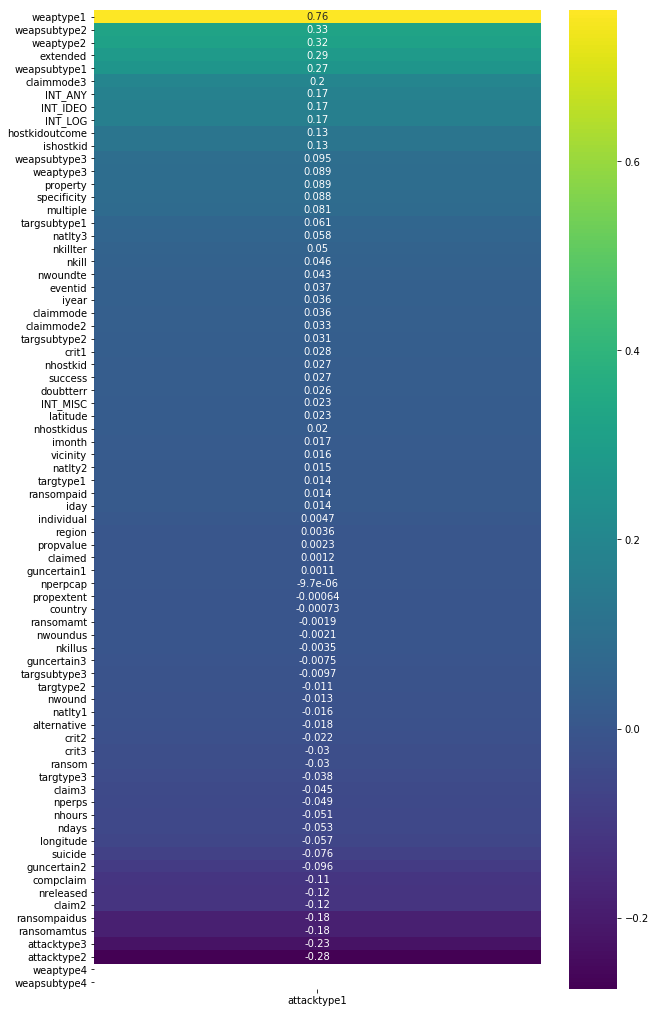

In [24]:
plt.subplots(figsize=(10,18))
sns.heatmap(df.corr()[['attacktype1']].sort_values('attacktype1', ascending=False).drop('attacktype1')\
            ,cmap='viridis', annot=True);
plt.savefig('../visuals/attacktype1_corr.jpg')

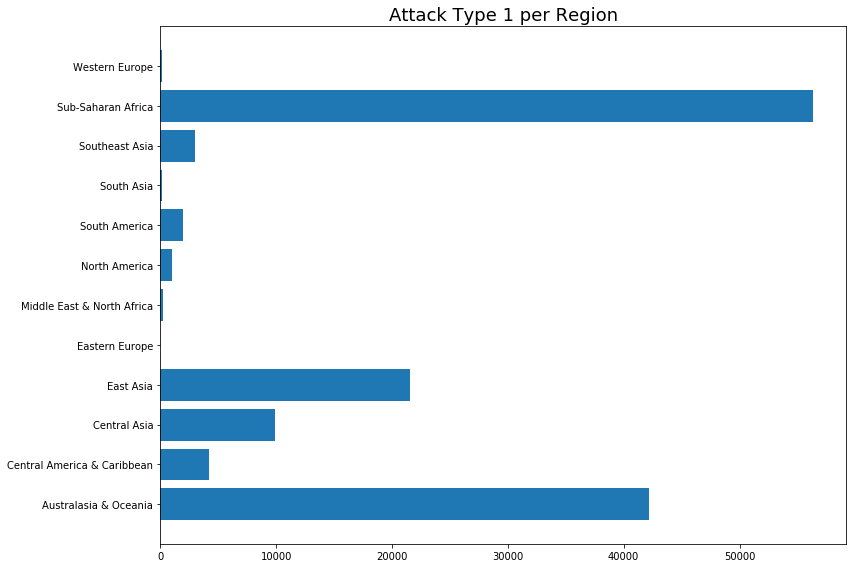

In [25]:
plt.figure(figsize=(12,8))
plt.title('Attack Type 1 per Region', fontsize=18)
plt.barh(df.region_txt.unique(), df.attacktype1.groupby(df.region_txt).sum())
#df.attacktype1.groupby(df.region_txt).sum().plot(kind='barh');
plt.tight_layout()
plt.savefig('../visuals/attacktype1_per_region.jpg')

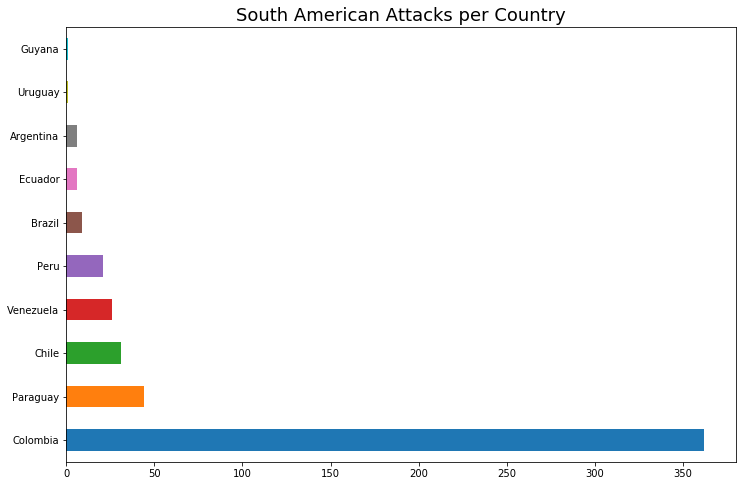

In [26]:
plt.figure(figsize=(12,8))
plt.title('South American Attacks per Country', fontsize=18)
df[df.region_txt == 'South America'].country_txt.value_counts().plot(kind='barh');
plt.savefig('../visuals/southamerica_attacks_per_country.jpg')

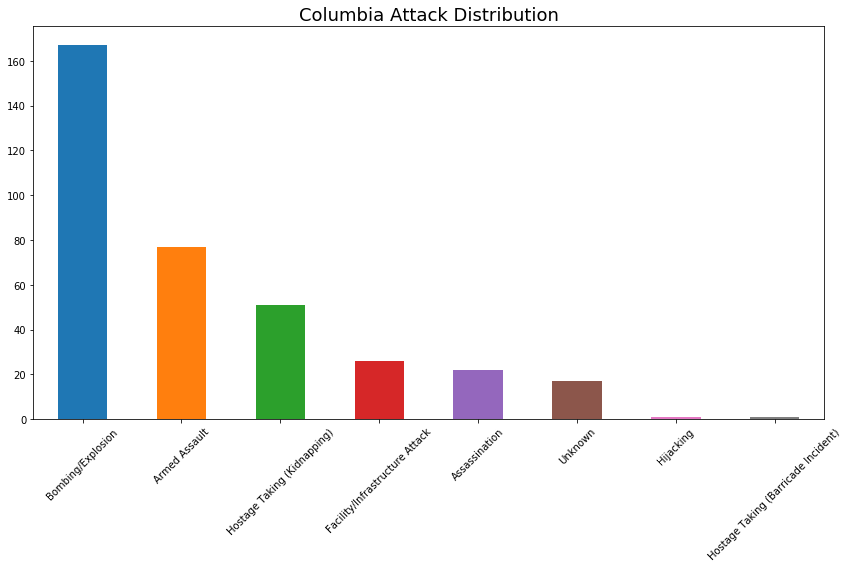

In [27]:
plt.figure(figsize=(12,8))
plt.title('Columbia Attack Distribution', fontsize=18)
#plt.bar()
df[( df.region_txt == 'South America') & (df.country_txt == 'Colombia')].attacktype1_txt.value_counts().plot(kind='bar');
plt.xticks(rotation=45);
plt.tight_layout()
plt.savefig('../visuals/columbia_attack_distribution.jpg')

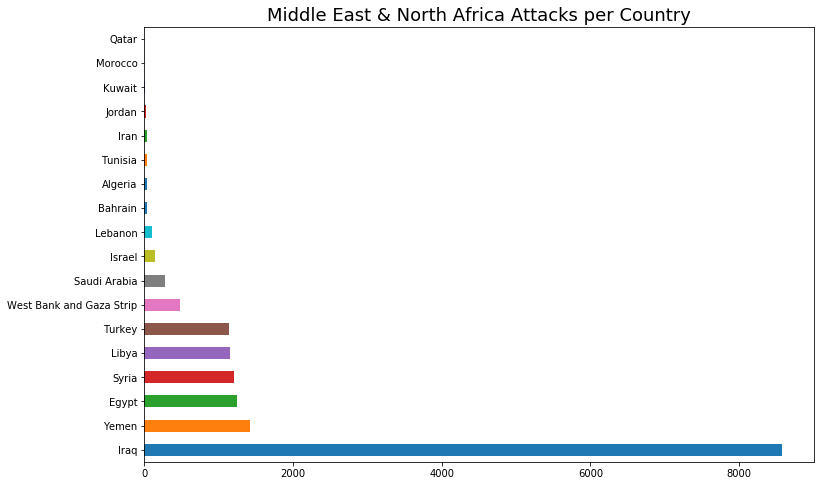

In [28]:
plt.figure(figsize=(12,8))
plt.title('Middle East & North Africa Attacks per Country', fontsize=18)
df[df.region_txt == 'Middle East & North Africa'].country_txt.value_counts().plot(kind='barh');
plt.savefig('../visuals/mideast_nafrica_attacks_per_country.jpg')

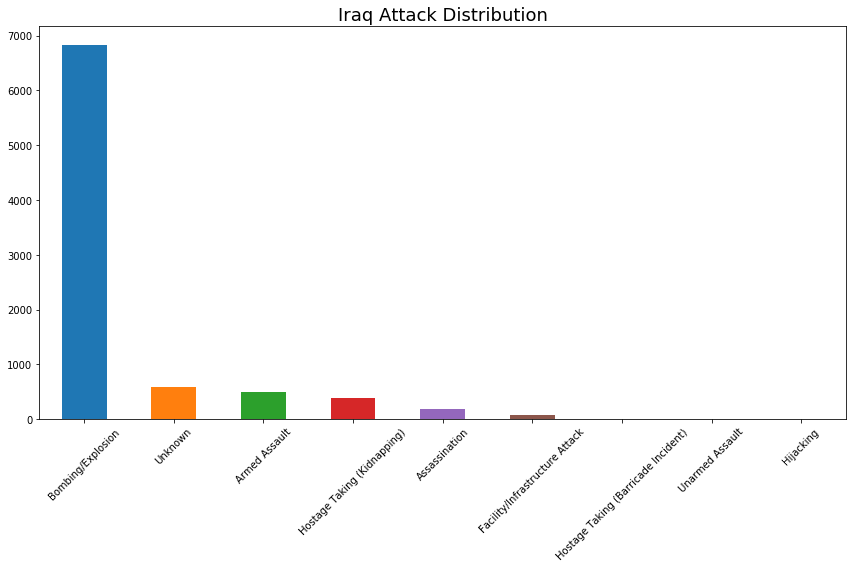

In [29]:
plt.figure(figsize=(12,8))
plt.title('Iraq Attack Distribution', fontsize=18)
df[( df.region_txt == 'Middle East & North Africa') & (df.country_txt == 'Iraq')].attacktype1_txt.value_counts().plot(kind='bar');
plt.xticks(rotation=45);
plt.tight_layout()
plt.savefig('../visuals/iraq_attack_distribution.jpg')

In [30]:
df.groupby('iyear')['attacktype1'].sum().sort_values(ascending=False)

iyear
2015    52107
2016    48618
2017    40018
Name: attacktype1, dtype: int64

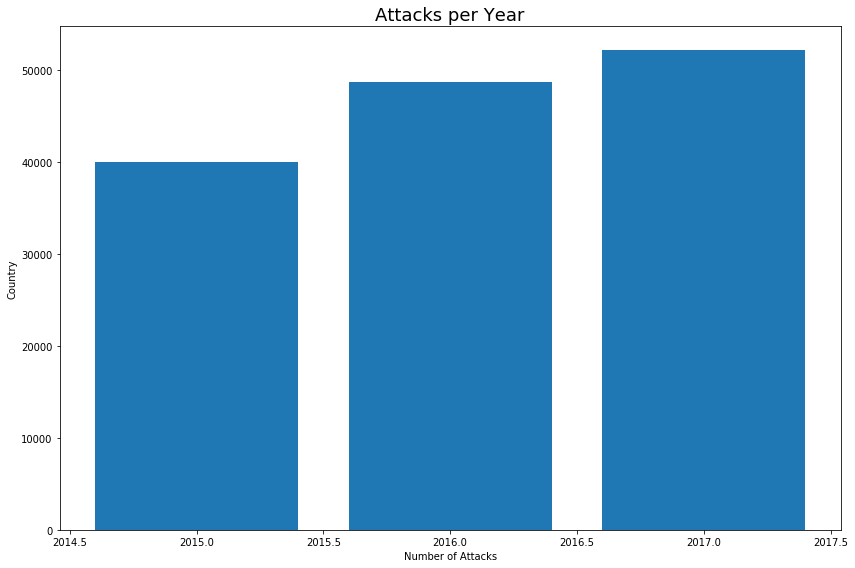

In [31]:
plt.figure(figsize=(12,8))
plt.title('Attacks per Year', fontsize=18)
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.bar(df.iyear.unique(),df.groupby('iyear')['attacktype1'].sum().sort_values())
plt.tight_layout()
plt.savefig('../visuals/attacks_per_year.jpg')

In [48]:
#df.groupby(['country_txt','iyear'])['attacktype1'].sum().sort_values(ascending=False)[:30]

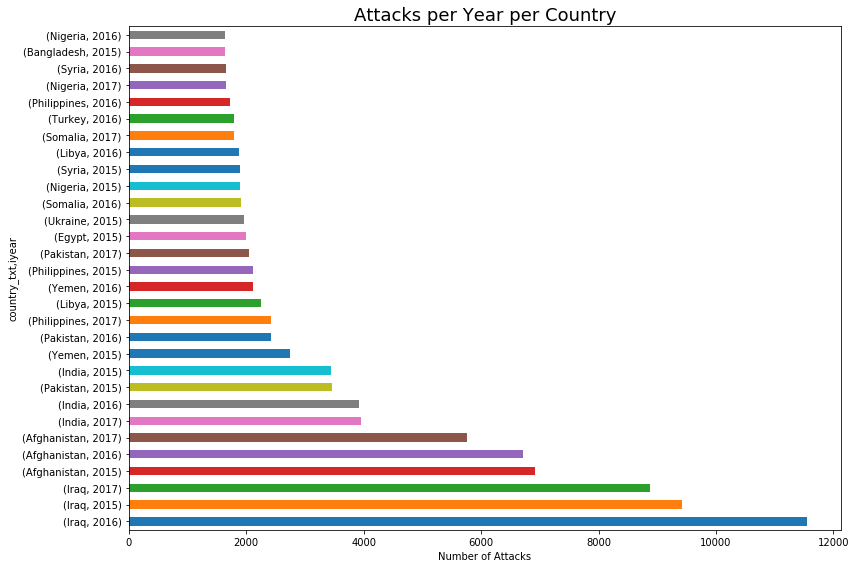

In [33]:
plt.figure(figsize=(12,8))
plt.title('Attacks per Year per Country', fontsize=18)
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
df.groupby(['country_txt','iyear'])['attacktype1'].sum().sort_values(ascending=False)[:30].plot(kind='barh')
plt.tight_layout()
plt.savefig('../visuals/attack_per_year_per_country.jpg')

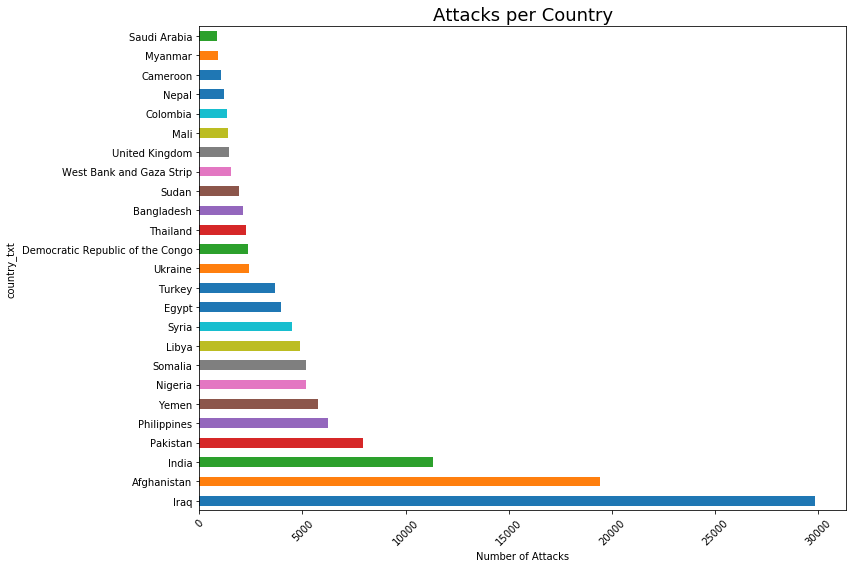

In [34]:
plt.figure(figsize=(12,8))
plt.title('Attacks per Country', fontsize=18)
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
(df.groupby('country_txt')['attacktype1'].sum().sort_values(ascending=False)[:25]).plot(kind='barh')
plt.xticks(rotation=45);
plt.tight_layout()
plt.savefig('../visuals/attacktype1_sum_per_country.jpg')

In [49]:
#pd.to_datetime(df.iyear.apply(lambda x: str(x))+'-'+df.imonth.apply(lambda x: str(x))+'-'+df.iday.apply(lambda x: str(x)))

In [36]:
(df.iyear.apply(lambda x: str(x))+'-'+df.imonth.apply(lambda x: str(x))+'-'+df.iday.apply(lambda x: str(x)))\
.str.contains('-0-0').value_counts(normalize=True)

False    1.0
dtype: float64

In [37]:
(df.imonth == 0).sum()

0

In [38]:
(df.iday == 0).sum()

0

In [50]:
#df.iyear.apply(lambda x: str(x))+'-'+df.imonth.apply(lambda x: str(x))+'-'+df.iday.apply(lambda x: str(x))

In [40]:
df.to_pickle('../data/df.pkl')

###  Bayesian Inference


## Iraq vs Columbia

In [41]:
df['Iraq'] = df.country_txt.map(lambda x: 1 if x == 'Iraq' else 0)
df['Colombia'] = df.country_txt.map(lambda x: 1 if x == 'Colombia' else 0)

In [42]:
iraq_perps = df[(df.Iraq == 1) & (df.nperps >= 0)].nperps.dropna().values
colombia_perps = df[(df.Colombia == 1) & (df.nperps >= 0)].nperps.dropna().values

print('Iraq:', iraq_perps.mean())
print('Colombia:', colombia_perps.mean())

Iraq: 6.295715778474399
Colombia: 7.5396825396825395


In [43]:
# pymc3 贝叶斯深度网络

import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\software\python\programs\python\python35\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [44]:
# 在数据中已经凶手数量的平均值和标准差
prior_mean = df[(df.nperps >= 0)].nperps.dropna().values.mean()
prior_std = df[(df.nperps >= 0)].nperps.dropna().values.std()
print(prior_mean)
print(prior_std)

13.371943723535036
87.82188220340987


In [45]:
with pm.Model() as model:
    
    iraq_mean = pm.Normal('iraq_mean', prior_mean, sd=prior_std)
    colombia_mean = pm.Normal('colombia_mean', prior_mean, sd=prior_std)
    
    iraq_std = pm.Gamma('iraq_std', mu=prior_std, sd=50)
    colombia_std = pm.Gamma('colombia_std', mu=prior_std, sd=50)
    
    iraq_ = pm.Normal('iraq_', mu=iraq_mean, sd=iraq_std, observed=iraq_perps)
    colombia_ = pm.Normal('colombia_', mu=colombia_mean, sd=colombia_std, observed=colombia_perps)
    
    mean_delta = pm.Deterministic('mean_delta', iraq_mean - colombia_mean)
    std_delta = pm.Deterministic('std_delta', iraq_std - colombia_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((iraq_std**2 + colombia_std**2)/2.)) 

In [51]:
with model:
    step = pm.NUTS()
    # 极大后验估计 MAP,使用最优化方法找到点估计,
    # find_MAP 使用Broyden–Fletcher–Goldfarb–Shanno (BFGS) 算法进行最优化运算，找到对数后验分布的最大值
    start = pm.find_MAP()
    trace = pm.sample(100000, start=start, step=step, njobs=4)